In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
from numpy import sqrt, random, array, argsort
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [2]:
#Vemos como es nuestro data set
data_frame = pd.read_csv('creditcardcsvpresent.csv')
data_frame.head()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [3]:
#Comprobamos cuales son los tipos de las caracteristicas
data_frame.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Transaction date                0 non-null      float64
 2   Average Amount/transaction/day  3075 non-null   float64
 3   Transaction_amount              3075 non-null   float64
 4   Is declined                     3075 non-null   object 
 5   Total Number of declines/day    3075 non-null   int64  
 6   isForeignTransaction            3075 non-null   object 
 7   isHighRiskCountry               3075 non-null   object 
 8   Daily_chargeback_avg_amt        3075 non-null   int64  
 9   6_month_avg_chbk_amt            3075 non-null   float64
 10  6-month_chbk_freq               3075 non-null   int64  
 11  isFradulent                     3075 non-null   object 
dtypes: float64(4), int64(4), object(4)

In [4]:
data_frame.describe()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
count,3.075000e+03,0.0,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000
mean,5.026634e+09,NaN,515.026556,9876.399210,0.957398,55.737561,40.022407,0.391870
std,9.870778e+08,NaN,291.906978,10135.331016,2.192391,206.634779,155.968840,1.548479
min,3.160041e+09,NaN,4.011527,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170814e+09,NaN,269.788047,2408.781147,0.000000,0.000000,0.000000,0.000000
50%,5.025578e+09,NaN,502.549575,6698.891856,0.000000,0.000000,0.000000,0.000000
75%,5.889625e+09,NaN,765.272803,14422.568935,0.000000,0.000000,0.000000,0.000000
max,6.665906e+09,NaN,2000.000000,108000.000000,20.000000,998.000000,998.000000,9.000000


In [5]:
data_frame = data_frame.drop(['Transaction date'], axis='columns')

<AxesSubplot:>

<Figure size 3240x1944 with 0 Axes>

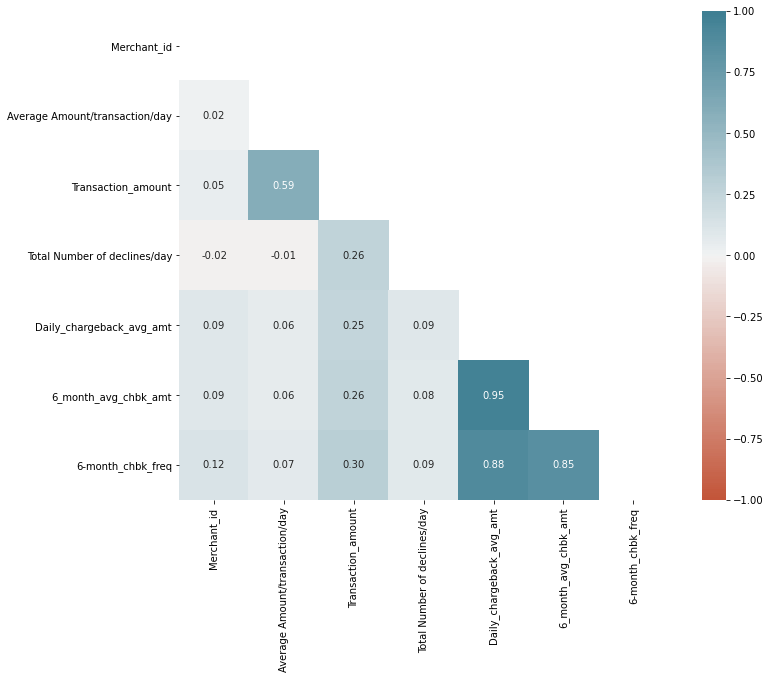

In [6]:
# Calcula coeficiente de correlación de Pearson

df_no_categor = data_frame
corr = df_no_categor.corr(method ='pearson') #por defecto Pearson ¿existe relación lineal entre variables?

plt.figure(figsize=(45,27))
#Mostramos solo la diagonal inferior.
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr,mask=mask,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True, fmt=".2f")
#plt.savefig('correlation.png')

In [7]:
data_frame.loc[data_frame['isFradulent']=='N','isFradulent'] = 0
data_frame.loc[data_frame['isFradulent']=='Y','isFradulent'] = 1

data_frame.loc[data_frame['Is declined']=='N','Is declined'] = 0
data_frame.loc[data_frame['Is declined']=='Y','Is declined'] = 1

data_frame.loc[data_frame['isForeignTransaction']=='N','isForeignTransaction'] = 0
data_frame.loc[data_frame['isForeignTransaction']=='Y','isForeignTransaction'] = 1

data_frame.loc[data_frame['isHighRiskCountry']=='N','isHighRiskCountry'] = 0
data_frame.loc[data_frame['isHighRiskCountry']=='Y','isHighRiskCountry'] = 1

data_frame.head(10)

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,100.0,3000.0,0,5,1,1,0,0.0,0,1
1,3160040998,100.0,4300.0,0,5,1,1,0,0.0,0,1
2,3160041896,185.5,4823.0,1,5,0,0,0,0.0,0,1
3,3160141996,185.5,5008.5,1,8,0,0,0,0.0,0,1
4,3160241992,500.0,26000.0,0,0,1,1,800,677.2,6,1
5,3160241992,500.0,27000.0,0,0,1,1,800,677.2,6,1
6,3160272997,262.5,11287.5,0,0,0,0,900,345.5,7,1
7,3162041996,185.5,11130.0,1,20,0,0,0,0.0,0,1
8,3162041996,185.5,6121.5,1,20,0,0,0,0.0,0,1
9,3162041996,185.5,7049.0,1,20,0,0,0,0.0,0,1


In [8]:
data_frame.describe()

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Total Number of declines/day,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
count,3.075000e+03,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000
mean,5.026634e+09,515.026556,9876.399210,0.957398,55.737561,40.022407,0.391870
std,9.870778e+08,291.906978,10135.331016,2.192391,206.634779,155.968840,1.548479
min,3.160041e+09,4.011527,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170814e+09,269.788047,2408.781147,0.000000,0.000000,0.000000,0.000000
50%,5.025578e+09,502.549575,6698.891856,0.000000,0.000000,0.000000,0.000000
75%,5.889625e+09,765.272803,14422.568935,0.000000,0.000000,0.000000,0.000000
max,6.665906e+09,2000.000000,108000.000000,20.000000,998.000000,998.000000,9.000000


In [9]:
data = data_frame.drop(['Merchant_id', 'isFradulent'], axis=1)
data.head()

,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq
0,100.0,3000.0,0,5,1,1,0,0.0,0
1,100.0,4300.0,0,5,1,1,0,0.0,0
2,185.5,4823.0,1,5,0,0,0,0.0,0
3,185.5,5008.5,1,8,0,0,0,0.0,0
4,500.0,26000.0,0,0,1,1,800,677.2,6


In [11]:
X= data
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

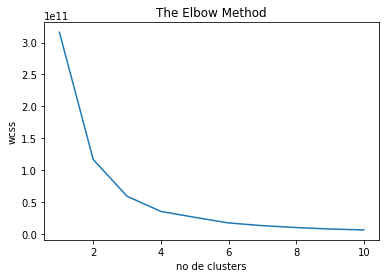

In [12]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no de clusters')
plt.ylabel('wcss')
plt.show()

In [13]:
kmeans_3 = KMeans(n_clusters = 3, init='k-means++', random_state=0).fit(X)
centroids = kmeans_3.cluster_centers_
print(centroids)

[[7.00174972e+02 1.75071163e+04 3.15126050e-02 1.22794118e+00
  2.75210084e-01 8.82352941e-02 8.78760504e+01 6.38938025e+01
  6.12394958e-01]
 [4.02153583e+02 4.03821498e+03 6.04838710e-03 6.62298387e-01
  1.69858871e-01 2.67137097e-02 2.77888105e+01 1.85146169e+01
  1.69858871e-01]
 [8.58038700e+02 4.09448511e+04 1.07913669e-01 3.31654676e+00
  7.69784173e-01 4.89208633e-01 2.34546763e+02 1.83517986e+02
  2.05035971e+00]]


In [14]:
kmeans_3.predict(X.head())

array([1, 1, 1, 1, 0])

In [15]:
kmeans_2 = KMeans(n_clusters = 2, init='k-means++', random_state=0).fit(X)
centroids = kmeans_2.cluster_centers_
print(centroids)

[[7.62946660e+02 2.39887753e+04 4.89417989e-02 1.71693122e+00
  3.82275132e-01 1.75925926e-01 1.25333333e+02 9.38986772e+01
  9.84126984e-01]
 [4.34203961e+02 5.27572809e+03 8.62440707e-03 7.09788702e-01
  1.79818887e-01 3.10478655e-02 3.30491591e+01 2.24586028e+01
  1.98792583e-01]]


Silhouette score for k= 2


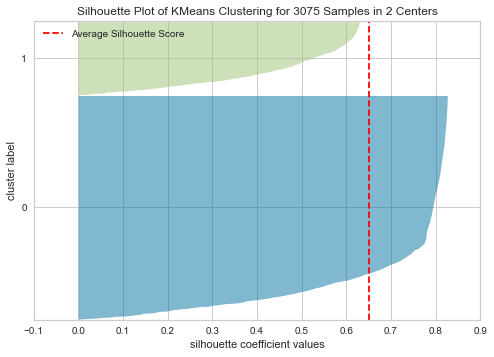

Silhouette score for k= 3


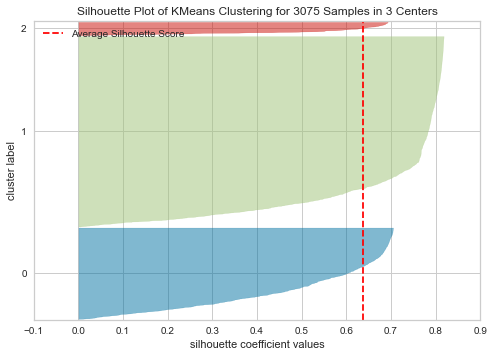

In [16]:
from yellowbrick.cluster import SilhouetteVisualizer
for i in [2,3]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
    print("Silhouette score for k= "+str(i))
    visualizer.fit(X) 
    visualizer.show()

In [17]:
#Creamos la función para calcular las distancias entre los centroides para detectar anomalias en el futuro
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.at[i] = np.linalg.norm(Xa-Xb)
    return distance

In [18]:
# An estimation of anomly population of the dataset (necessary for several algorithm)
outliers_fraction = 0.09

# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(X, kmeans_2)

number_of_outliers = int(outliers_fraction*len(distance))
print(number_of_outliers)
threshold = distance.nlargest(number_of_outliers).min()


# anomaly contain the anomaly result (0:normal, 1:anomaly) 
data_frame['anomaly'] = (distance >= threshold).astype(int)

<ipython-input-17-0ecf4ce0d80f>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  distance = pd.Series()


276


In [19]:
#Habria que ajustar el threshold correctamente para un algoritmo más eficiente
data_frame[data_frame['anomaly'] == 1]

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent,anomaly
19,3394638119,675.569475,39858.599050,0,9,1,0,0,0.0,0,1,1
21,3405816400,804.761766,42652.373600,0,0,0,0,953,950.0,8,1,1
25,3450127241,780.688498,36692.359410,0,0,1,0,896,839.0,6,1,1
26,3462219091,947.489028,44531.984300,0,7,1,0,0,0.0,0,1,1
29,3498029973,679.940335,38076.658740,0,0,1,1,0,0.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3045,6638540153,6.309560,164.048571,0,0,1,0,0,0.0,0,0,1
3048,6642146926,131.786344,131.786344,0,0,0,0,0,0.0,0,0,1
3058,6654871637,894.548030,0.000000,0,1,0,0,0,0.0,0,0,1
3071,6661273532,800.000000,0.000000,1,0,0,0,754,585.0,7,0,1
